# TV shows Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the `popularity` of a movie or TV show

<img src="image.jpg" width=300 />




The dataset contains a list of movies and TV shows with the following characteristics:
- `title`: title of the movie in english
- `original_title`: original title of the movie 
- `duration_min`: duration of the movie in minutes
- `popularity`: popularity of the movie in terms of review scores
- `release_date`: release date
- `description`: short summary of the movie
- `budget`: budget spent to produce the movie in USD
- `revenue`: movie revenue in USD 
- `original_language`: original language 
- `status`: is the movie already released or not
- `number_of_awards_won`: number of awards won for the movie
- `number_of_nominations`: number of nominations
- `has_collection`: if the movie is part of a sequel or not
- `all_genres`: genres that described the movie (can be zero, one or many!) 
- `top_countries`: countries where the movie was produced (can be zero, one or many!) 
- `number_of_top_productions`: number of top production companies that produced the film if any. 
Top production companies includes: Warner Bros, Universal Pictures, Paramount Pictures, Canal+, etc...
- `available_in_english`: whether the movie is available in english or not

The dataset contains a list of movies and TV shows with the following characteristics:
- `title`: title of the movie in english
- `original_title`: original title of the movie 
- `duration_min`: duration of the movie in minutes
- `popularity`: popularity of the movie in terms of review scores
- `release_date`: release date
- `description`: short summary of the movie
- `budget`: budget spent to produce the movie in USD
- `revenue`: movie revenue in USD 
- `original_language`: original language 
- `status`: is the movie already released or not
- `number_of_awards_won`: number of awards won for the movie
- `number_of_nominations`: number of nominations
- `has_collection`: if the movie is part of a sequel or not
- `all_genres`: genres that described the movie (can be zero, one or many!) 
- `top_countries`: countries where the movie was produced (can be zero, one or many!) 
- `number_of_top_productions`: number of top production companies that produced the film if any. 
Top production companies includes: Warner Bros, Universal Pictures, Paramount Pictures, Canal+, etc...
- `available_in_english`: whether the movie is available in english or not

## Imports

Run the following cell to load the basic packages:

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nbresult import ChallengeResult

In [170]:
pd.options.mode.chained_assignment = None  # default='warn'

## Data collection

📝 **Load the `movie_popularity.csv` dataset from the provided this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/tv_movies_popularity.csv)**
- First, check and remove the rows that may be complete duplicate from one another (we never know!)
- Then, drop the columns that have too much missing values
- Finally, drop the few remaining rows that have missing values
- Store the result in a `DataFrame` named `data`

In [199]:
! ls

README.md                     scores.jpg
TV_popularity_predictor.ipynb tests
image.jpg                     tv_movies_popularity.csv


In [200]:
data = pd.read_csv("tv_movies_popularity.csv")
data.head(3)

,original_title,title,popularity,release_date,duration_min,description,budget,revenue,original_language,status,number_of_awards_won,number_of_nominations,has_collection,all_genres,top_countries,number_of_top_productions,available_in_english
0,Hot Tub Time Machine 2,Hot Tub Time Machine 2,6.575393,2015-02-20,93.0,"When Lou's shot in the groin, Nick and Jacob d...",14000000,12314651.0,en,Released,0,2,1,Comedy,United States of America,3,True
1,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,8.248895,2004-08-06,113.0,"Now settled in Genovia, Princess Mia faces a n...",40000000,95149435.0,en,Released,1,2,1,"Comedy, Drama, Family, Romance",United States of America,1,True
2,Whiplash,Whiplash,64.299990,2014-10-10,105.0,A promising young drummer enrolls at a cut-thr...,3300000,13092000.0,en,Released,97,145,0,Drama,United States of America,0,True


In [201]:
def remove_duplicates(data):
    new_data = data.drop_duplicates()
    print(f"Dropped {len(data)-len(new_data)} complete duplicates from data")
    return new_data

In [202]:
# Checking what could be missing values other than nan

objects = ['original_title', 'title','description','release_date','original_language', 'status',
       'all_genres', 'top_countries', 'available_in_english']
numbers = [x for x in list(data.columns) if x not in objects]

#Visual inspection:

for col in objects:
    print(data[col].unique())
    
for col in numbers:
    print(data[col].min())
    print(data[col].max()) 

# At first sight looks ok

['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows'
 'Vivre sa vie: film en douze tableaux']
['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows' 'Vivre Sa Vie']
["When Lou's shot in the groin, Nick and Jacob drag him in the Hot Tub Time Machine to go back in time and save Lou. The three end up 10 years in the future, where they need to go to find the shooter."
 'Now settled in Genovia, Princess Mia faces a new revelation: she is being primed for an arranged marriage to an English suitor.'
 "A promising young drummer enrolls at a cut-throat music conservatory where his dreams of greatness are mentored by an instructor who will stop at nothing to realize a student's potential."
 ...
 'A lawyer sees the chance to salvage his career and self-respect by taking a medical malpractice case to trial rather than settling.'
 'A young woman is followed by an unknown supernatural 

In [203]:
# Perecentage of null values for each column
data.isnull().sum().sort_values(ascending=False)/len(data)

# Revenue: 59% missing so won't be a good predictor
# I did it a little differently at first: 
# Title: where missing (1 item), let's replace it with Original Title
# But I'll drop the row 

def deal_with_null(data):
    print("Null values %:")
    print((data.isnull().sum().sort_values(ascending=False)/len(data)).head())

    new_data = data.drop(columns=['revenue'])
    print(f"Removed revenue column")

    print("Null values %:")
    print((new_data.isnull().sum().sort_values(ascending=False)/len(new_data)).head())
    
    #new_data.loc[new_data.title.isnull(),"title"] = new_data.loc[new_data.title.isnull(),"original_title"]
    print(f"Where missing, replaced title by original_title")

    # Actually no, dropping the remaining 'with null' row instead
    print(f"Actually no, dropping the remaining 'with null' row instead")
    
    new_data = new_data.dropna(how='any', axis=0)

    print("Null values %:")
    print((new_data.isnull().sum().sort_values(ascending=False)/len(new_data)).head())

    return new_data

In [204]:
def clean_data(data):
    data = remove_duplicates(data)
    data = deal_with_null(data)
    return data

data = clean_data(data)

Dropped 400 complete duplicates from data
Null values %:
revenue                      0.595142
title                        0.000155
original_title               0.000000
number_of_awards_won         0.000000
number_of_top_productions    0.000000
dtype: float64
Removed revenue column
Null values %:
title             0.000155
original_title    0.000000
popularity        0.000000
release_date      0.000000
duration_min      0.000000
dtype: float64
Where missing, replaced title by original_title
Actually no, dropping the remaining 'with null' row instead
Null values %:
original_title    0.0
title             0.0
popularity        0.0
release_date      0.0
duration_min      0.0
dtype: float64


### 🧪 Run the following cell to save your results

In [205]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "data_cleaning",
    columns=data.columns,
    cleaning=sum(data.isnull().sum()),
    shape=data.shape)
result.write()

## Baseline model

### The metric

📝 **We want to predict `popularity`: Start by plotting a histogram of the target to visualize it**

📝 **Which sklearn's scoring [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use if we want it to:**

- Be better when greater (i.e. metric_good_model > metric_bad_model)
- Penalize **more** an error between 10 and 20 compared with an error between 110 and 120
- Said otherwise, what matter should be the **relative error ratio**, more than the absolute error difference

Hint: the histogram plotted above should give you some intuition about it

👉 Store its exact [sklearn scoring name](https://scikit-learn.org/stable/modules/model_evaluation.html) as `string` in the variable `scoring` below.

🚨 You must use this metric for the rest of the challenge

maximum popularity: 547.488298


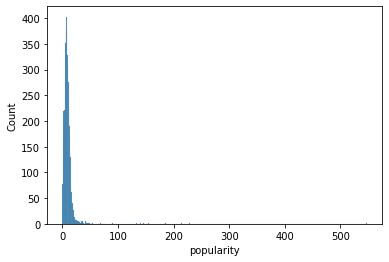

In [51]:
sns.histplot(data.popularity)
print(f"maximum popularity: {data.popularity.max()}")

In [53]:
# I would go for MAE to avoid over-penalize outliers (as opposed to RMSE)
# BUT it is a metric that is lower for good models
# Hence:

scoring = 'neg_mean_absolute_error'



<details>
    <summary>💡 Hint</summary>
It is around here!
<img src="scores.jpg" width=200 height=400 />
</details>

### X,y

**📝 Define `X` as the features Dataframe (keep all features) and `y` as the target Series.**

In [56]:
X = data.drop(columns=['popularity'])

y = data['popularity']


### Basic pipeline

📝 **Check unique values per features**

In [57]:
# Done that befdore when looking for "hidden" outliers

objects = ['original_title', 'title','description','release_date','original_language', 'status',
       'all_genres', 'top_countries', 'available_in_english']
numbers = [x for x in list(data.columns) if x not in objects]

#Visual inspection:

for col in objects:
    print(data[col].unique())

['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows'
 'Vivre sa vie: film en douze tableaux']
['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows' 'Vivre Sa Vie']
["When Lou's shot in the groin, Nick and Jacob drag him in the Hot Tub Time Machine to go back in time and save Lou. The three end up 10 years in the future, where they need to go to find the shooter."
 'Now settled in Genovia, Princess Mia faces a new revelation: she is being primed for an arranged marriage to an English suitor.'
 "A promising young drummer enrolls at a cut-throat music conservatory where his dreams of greatness are mentored by an instructor who will stop at nothing to realize a student's potential."
 ...
 'A lawyer sees the chance to salvage his career and self-respect by taking a medical malpractice case to trial rather than settling.'
 'A young woman is followed by an unknown supernatural 

In this baseline, let's forget about the columns below that are difficult to process

In [61]:
text = ['description', 'original_title', 'title']
dates = ['release_date'] 

We will simply scale the numerical features and one-hot-encode the categorical ones remaining

📝 **Prepare 2 `list`s of features names as `str`**:
- `numerical` which contains **only** numerical features
- `categorical` which contains **only** categorical features (exept text and dates above)

In [66]:
numerical = ['duration_min', 'budget', 'number_of_awards_won', 'number_of_nominations', 'has_collection',
       'number_of_top_productions']

exclusion_list = numerical + text + dates
categorical = [col for col in list(X.columns) if col not in exclusion_list]

categorical

['original_language',
 'status',
 'all_genres',
 'top_countries',
 'available_in_english']

### Pipelining

You are going to build a basic pipeline made of a basic preprocessing and a trees-based model of your choice.

#### Preprocessing pipeline

**📝 Create a basic preprocessing pipeline for the 2 types of features above:**
- It should scale the `numerical` features
- one-hot-encode the `categorical` and `boolean` features
- drop the others
- Store your pipeline in a `basic_preprocessing` variable

In [83]:
# Execute this cell to enable a nice display for your pipelines
from sklearn import set_config; set_config(display='diagram')

<AxesSubplot:>

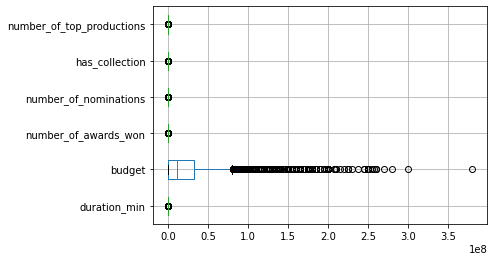

In [77]:
# Looking at outliers to decide which way to scale

data[numerical].boxplot(vert=False)

<AxesSubplot:>

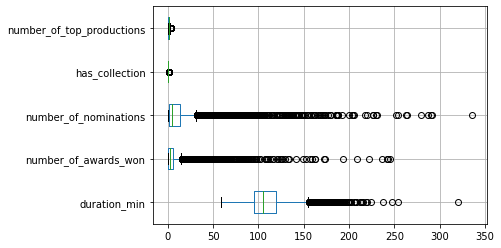

In [76]:
data[[x for x in numerical if x !="budget"]].boxplot(vert=False)

In [90]:
# Many outliers for most or all features so we'll use RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_transformer = OneHotEncoder(handle_unknown='ignore')

column_trans = ColumnTransformer([
    ('scaler', RobustScaler(), numerical),
    ('encoder', cat_transformer, categorical)
     ])

# scale the numerical features
# one-hot-encode the categorical and boolean features
# not using remainder = passthrough is enough to drop the other columns

basic_preprocessing = Pipeline( steps = [
    ('column_trans', column_trans)])

basic_preprocessing

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['duration_min', 'budget',
                                                   'number_of_awards_won',
                                                   'number_of_nominations',
                                                   'has_collection',
                                                   'number_of_top_productions']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['original_language',
                                                   'status', 'all_genres',
                                                   'top_countries',
                                                   'available_in_english'])]))])

**📝 Encode the features and store the result in the variable `X_basic_preprocessing`.**

In [94]:
X_basic_preprocessing = basic_preprocessing.fit_transform(X)

print(f"{X_basic_preprocessing.shape[1] - X.shape[1]} additional features have been generated (not counting those 'replaced')")



1103 additional features have been generated (not counting those 'replaced')


**❓ How many features has been generated by the preprocessing? What do you think about this number?**

> Over 1000 (1103 not counting those "replaced") additional features have been generated: 
> that will for sure add computational load, hence slowness, to our model. 
> 
> This large number is linked to considering each combination of genre eg as a separate feature. 
> Also, because of "curse fo dimensionnality", we need more data when we add more features. Do we have enough?
>
> if the performance shows otherwise, we might consider untangling genres and countries, smart grouping eg for the original languages (Eastern Europe, Asia...)

#### Modeling pipeline

Let's add a model to our pipe. With so many features one-hot-encoded, we **need a model which can act as a feature selector**

👉 A linear model regularized with L1 penalty is a good starting point.


**📝 Create a `basic_pipeline` which encapsulate the `basic_preprocessing` pipeline + a linear model with a L1 penalty**

- store the resulting pipeline as `basic_pipeline`
- don't fine-tune it


<details>
    <summary>Hints</summary>

Choose your model from the list [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

</details>

In [96]:
from sklearn.linear_model import Lasso

In [98]:
model = Lasso()

basic_pipeline = Pipeline( steps = [
    ('basic_preprocessing', basic_preprocessing),
    ('l1_model', model)])

basic_pipeline

Pipeline(steps=[('basic_preprocessing',
                 Pipeline(steps=[('column_trans',
                                  ColumnTransformer(transformers=[('scaler',
                                                                   RobustScaler(),
                                                                   ['duration_min',
                                                                    'budget',
                                                                    'number_of_awards_won',
                                                                    'number_of_nominations',
                                                                    'has_collection',
                                                                    'number_of_top_productions']),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['original_language',
                                                                    'status',
                                                                    'all_genres',
                                                                    'top_countries',
                                                                    'available_in_english'])]))])),
                ('l1_model', Lasso())])

### Cross-validated baseline

**📝 Perform a cross-validated evaluation of your baseline model using the metric you defined above. Store the results of this evaluation as an `array` of floating scores in the `basic_scores` variable.**

In [102]:
from sklearn.model_selection import cross_val_score

# I wonder if we should do a train_test_split, to keep some test values for the end, but it looks like not

basic_scores = cross_val_score(basic_pipeline, X, y, 
        cv=5, scoring=scoring)

### 🧪 Save your results

Run the following cell to save your results

In [103]:
ChallengeResult(
    'baseline',
    metric=scoring,
    features=[categorical,numerical],
    preproc=basic_preprocessing,
    preproc_shape=X_basic_preprocessing.shape,
    pipe=basic_pipeline,
    scores=basic_scores
).write()

## Feature engineering

### Time Features


👉 Let's try to improve performance using the feature `release_date`, and especially its `month` and `year`.

ℹ️ If you want to skip this section, you can move directly to the next one: _Advanced categorical features_.

**📝 Complete the custom transformer `TimeFeaturesExtractor` below**

Running
```python
TimeFeaturesExtractor().fit_transform(X[['release_date']])
``` 
should return something like

|    |   month |   year |
|---:|--------:|-------:|
|  0 |       2 |   2015 |
|  1 |       8 |   2004 |
|  2 |      10 |   2014 |
|  3 |       3 |   2012 |
|  4 |       8 |   2012 |


In [131]:
from datetime import datetime
from sklearn.base import BaseEstimator, TransformerMixin

class TimeFeaturesExtractor(BaseEstimator, TransformerMixin):
    """Extract the 2 time features from a date"""
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
        Params:
        X: DataFrame
        y: Series
        
        Returns a DataFrame with 2 columns containing the time features as integers extracted from the release_date.
        """
        
        X.loc[:,'month'] = pd.to_datetime(X['release_date']).dt.month
        X.loc[:,'year'] = pd.to_datetime(X['release_date']).dt.year

        return X[['month','year']]


In [206]:
TimeFeaturesExtractor().fit_transform(X[['release_date']])

,month,year
0,2,2015
1,8,2004
2,10,2014
3,3,2012
4,8,2012
...,...,...
6459,8,2001
6460,8,2004
6461,12,1982
6462,2,2015


In [207]:
# Try your transformer and save your new features here
X_time_features = TimeFeaturesExtractor().fit_transform(X[['release_date']])
X_time_features.head()

,month,year
0,2,2015
1,8,2004
2,10,2014
3,3,2012
4,8,2012


We still have 2 problems to solve
- `month` is cyclical: 12 should be a close to 1 as to 11, right? 
- `year` is not scaled

**📝 Build a final custom transformer `CyclicalEncoder` so that**

Running
```python
CyclicalEncoder().fit_transform(X_time_features)
``` 
should return something like this

|    |    month_cos |   month_sin |      year |
|---:|-------------:|------------:|----------:|
|  0 |  0.5         |    0.866025 | 0.0466039 |
|  1 | -0.5         |   -0.866025 | 0.0411502 |
|  2 |  0.5         |   -0.866025 | 0.0461081 |
|  3 |  6.12323e-17 |    1        | 0.0451165 |
|  4 | -0.5         |   -0.866025 | 0.0451165 |

With the cyclical encoding is done as below
- `month_cos = 2 * math.pi / 12 * X[['month']] `
- `month_sin = 2 * math.pi / 12 * X[['month']] `

And the `year` begin min-max scaled

In [138]:
np.cos(2 * math.pi / 12 * X_time_features[['month']])

,month
0,5.000000e-01
1,-5.000000e-01
2,5.000000e-01
3,6.123234e-17
4,-5.000000e-01
...,...
6459,-5.000000e-01
6460,-5.000000e-01
6461,1.000000e+00
6462,5.000000e-01


In [149]:
from sklearn.base import BaseEstimator, TransformerMixin
import math

class CyclicalEncoder(BaseEstimator, TransformerMixin):
    """
    Encode a cyclical feature
    """
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        Compute here what you need for the transform phase and store it as instance variable
        """
        self.year_min = X["year"].min()
        self.year_max = X["year"].max()
        return self 

    def transform(self, X, y=None):
        """
        Compute and returns the final DataFrame
        """
        #Min-max scaling the year
        X['year'] = (X['year']-self.year_min)/(self.year_max-self.year_min)
        # computing cyclical data for months
        X['month_cos'] = np.cos(2 * math.pi / 12 * X[['month']])
        X['month_sin'] = np.sin(2 * math.pi / 12 * X[['month']])
        
        return X[['year','month_cos','month_sin']]

In [151]:
# Try your transformer and save your new features here
X_time_cyclical = CyclicalEncoder().fit_transform(X_time_features)
X_time_cyclical.head()

,year,month_cos,month_sin
0,0.979167,5.000000e-01,0.866025
1,0.864583,-5.000000e-01,-0.866025
2,0.968750,5.000000e-01,-0.866025
3,0.947917,6.123234e-17,1.000000
4,0.947917,-5.000000e-01,-0.866025


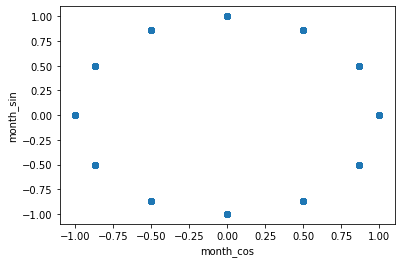

In [152]:
# Check that this form a circle with 12 points
plt.scatter(X_time_cyclical['month_cos'],
            X_time_cyclical['month_sin'])
plt.xlabel("month_cos"); plt.ylabel("month_sin");

**📝 Enhance your `basic_pipeline` with a new preprocessing including both `TimeFeaturesExtractor` and `CyclicalFeatureExtractor`:**

- Just use `TimeFeatureExtractor` if you haven't had time to do the `Cyclical` one
- Store this new pipeline as `time_pipeline`
- Keep same estimator for now

In [157]:
from sklearn.pipeline import FeatureUnion

basic_and_time = FeatureUnion([
    ('basic_preprocessing', basic_preprocessing), # existing columns
    ('time', TimeFeaturesExtractor()),
    ('cyclical', CyclicalEncoder())# new colums
])

time_pipeline =  Pipeline( steps = [
    ('basic_and_time', basic_and_time),
    ('l1_model', model)])

time_pipeline

Pipeline(steps=[('basic_and_time',
                 FeatureUnion(transformer_list=[('basic_preprocessing',
                                                 Pipeline(steps=[('column_trans',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['duration_min',
                                                                                                    'budget',
                                                                                                    'number_of_awards_won',
                                                                                                    'number_of_nominations',
                                                                                                    'has_collection',
                                                                                                    'number_of_top_productions']),
                                                                                                  ('encoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                                   ['original_language',
                                                                                                    'status',
                                                                                                    'all_genres',
                                                                                                    'top_countries',
                                                                                                    'available_in_english'])]))])),
                                                ('time',
                                                 TimeFeaturesExtractor()),
                                                ('cyclical',
                                                 CyclicalEncoder())])),
                ('l1_model', Lasso())])

### Advanced categorical encoder to reduce the number of features

ℹ️ Most of it has already been coded for you and it shouldn't take long. Still if you want to skip it and move to the next section: _Model Tuning_

👉 We need to reduce the number of features to one-hot-encode, which arise from the high cardinality of `all_genres` and `top_countries`

In [127]:
X[['all_genres', 'top_countries']].nunique()

all_genres       745
top_countries    320
dtype: int64

👇 Both share a common pattern: there can be more than 1 country and more than 1 genre per movie.

In [128]:
X[['all_genres', 'top_countries']].tail()

,all_genres,top_countries
6459,Thriller,"France, United States of America"
6460,"Action, Adventure, Comedy, Thriller",United States of America
6461,Drama,United States of America
6462,"Horror, Thriller",United States of America
6463,Drama,France


👉 Run the cell below where we have coded for you a custom transformer `CustomGenreAndCountryEncoder` which: 
- Select the 10 most frequent genres and the 5 most frequent countries
- Encode `all_genres` into 10 One Hot Encoded features
- Encode `top_countries` into 5 One Hot Encoded features

In [129]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin

class CustomGenreAndCountryEncoder(BaseEstimator, TransformerMixin):
    """
    Encoding the all_genres and top_companies features which are multi-categorical :
    a movie has several possible genres and countries of productions!
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        compute top genres and top countries of productions from all_genres and top_countries features
        """

        # compute top 10 genres       
        list_of_genres = list(X['all_genres'].apply(lambda x: [i.strip() for i in x.split(",")] if x != [''] else []).values)
        top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(10)]

        # save top_genres in dedicated instance variable
        self.top_genres = top_genres
        
         # compute top 5 countries       
        list_of_countries = list(X['top_countries'].apply(lambda x: [i.strip() for i in x.split(",")] if x != [''] else []).values)
        top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(5)]

        # save top_countries in dedicated instance variable
        self.top_countries = top_countries

        return self

    def transform(self, X, y=None):
        """
        encoding genre and country
        """
        X_new = X.copy()
        for genre in self.top_genres:
            X_new['genre_' + genre] = X_new['all_genres'].apply(lambda x: 1 if genre in x else 0)
        X_new = X_new.drop(columns=["all_genres"])
        for country in self.top_countries:
            X_new['country_' + country] = X_new['top_countries'].apply(lambda x: 1 if country in x else 0)
        X_new = X_new.drop(columns=["top_countries"])
        return X_new

In [130]:
# Check it out
X_custom = CustomGenreAndCountryEncoder().fit_transform(X[['all_genres', 'top_countries']])
print(X_custom.shape)
X_custom.head()

(6463, 15)


,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,country_United States of America,country_United Kingdom,country_France,country_Germany,country_Canada
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


**📝 Compute your `final_pipeline` by integrating all these transformers** (or all those you have coded)

- `CustomGenreAndCountryEncoder`
- `TimeFeaturesExtractor`
- `CyclicalFeatureExtractor`

In [248]:
# We need to edit our basic pipeline, that encoded the Genre and Country already


custom_encoded = ['all_genres', 'top_countries']

exclusion_list = numerical + text + dates + custom_encoded

categorical = [col for col in list(X.columns) if col not in exclusion_list]

cat_transformer = OneHotEncoder(handle_unknown='ignore')

column_trans = ColumnTransformer([
    ('scaler', RobustScaler(), numerical),
    ('encoder', cat_transformer, categorical),
    ('custom_encoder', CustomGenreAndCountryEncoder(), custom_encoded)
     ])

basic_preprocessing = Pipeline( steps = [
    ('column_trans', column_trans)])

basic_final = FeatureUnion([
    ('basic_preprocessing', basic_preprocessing), # New basic_preprocessing for existing columns
    ('time', TimeFeaturesExtractor()),
    ('cyclical', CyclicalEncoder())# new colums
])

final_pipeline =  Pipeline( steps = [
    ('basic_and_time', basic_final),
    ('l1_model', model)])

final_pipeline

Pipeline(steps=[('basic_and_time',
                 FeatureUnion(transformer_list=[('basic_preprocessing',
                                                 Pipeline(steps=[('column_trans',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['duration_min',
                                                                                                    'budget',
                                                                                                    'number_of_awards_won',
                                                                                                    'number_of_nominations',
                                                                                                    'has_collection',
                                                                                                    'number_of_top_productions']),
                                                                                                  ('encoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                                   ['original_language',
                                                                                                    'status',
                                                                                                    'available_in_english',
                                                                                                    'month',
                                                                                                    'year',
                                                                                                    'month_cos',
                                                                                                    'month_sin']),
                                                                                                  ('custom_encoder',
                                                                                                   CustomGenreAndCountryEncoder(),
                                                                                                   ['all_genres',
                                                                                                    'top_countries'])]))])),
                                                ('time',
                                                 TimeFeaturesExtractor()),
                                                ('cyclical',
                                                 CyclicalEncoder())])),
                ('l1_model', Lasso())])

📝 **Compute and store its cross validated scores as `final_scores` array of floats**

- It does not necessarily improve the performance before we can try-out doing model tuning
- However, with a now limited number of features, we will be able to train more complex models in next section (ensemble...)

In [249]:
final_scores = cross_val_score(final_pipeline, X, y, 
        cv=5, scoring=scoring)
final_scores

array([-4.08767309, -4.28321816, -3.96969687, -3.95149059, -4.4788619 ])

### 🧪 Save your result

Run the following cell to save your results.

In [250]:
ChallengeResult(
    'feature_engineering',
    X_time_features=X_time_features,
    X_time_cyclical= X_time_cyclical,
    time_pipeline=time_pipeline,
    final_pipeline=final_pipeline,
    final_scores=final_scores
).write()

# Hint: Try restarting your notebook if you obtain an error about saving a custom encoder

## Model tuning

### Random Forest

📝 **Change the estimator of your `final_pipeline` by a Random Forest and checkout your new cross-validated score**

In [251]:
from sklearn.ensemble import RandomForestRegressor

final_pipeline =  Pipeline( steps = [
    ('basic_and_time', basic_final),
    ('model', RandomForestRegressor())])

final_pipeline

Pipeline(steps=[('basic_and_time',
                 FeatureUnion(transformer_list=[('basic_preprocessing',
                                                 Pipeline(steps=[('column_trans',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['duration_min',
                                                                                                    'budget',
                                                                                                    'number_of_awards_won',
                                                                                                    'number_of_nominations',
                                                                                                    'has_collection',
                                                                                                    'number_of_top_productions']),
                                                                                                  ('encoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                                   ['original_language',
                                                                                                    'status',
                                                                                                    'available_in_english',
                                                                                                    'month',
                                                                                                    'year',
                                                                                                    'month_cos',
                                                                                                    'month_sin']),
                                                                                                  ('custom_encoder',
                                                                                                   CustomGenreAndCountryEncoder(),
                                                                                                   ['all_genres',
                                                                                                    'top_countries'])]))])),
                                                ('time',
                                                 TimeFeaturesExtractor()),
                                                ('cyclical',
                                                 CyclicalEncoder())])),
                ('model', RandomForestRegressor())])

In [252]:
rf_scores = cross_val_score(final_pipeline, X, y, 
        cv=5, scoring=scoring)
rf_scores

array([-3.91748153, -3.79204446, -3.89236181, -3.83350978, -4.20406372])

### Best hyperparameters quest



**📝 Fine tune your model to try to get the best performance in the minimum amount of time!**

- Store the result of your search inside the `search` variable.
- Store your 5 cross-validated scores inside `best_scores` array of floats

In [253]:
# Not sure about what the text means but probably suggests a gridsearch or randomizedsearch

In [183]:
final_pipeline.get_params().keys()
rf_model__min_samples_leaf'
rf_model__max_depth
'model'

dict_keys(['memory', 'steps', 'verbose', 'basic_and_time', 'rf_model', 'basic_and_time__n_jobs', 'basic_and_time__transformer_list', 'basic_and_time__transformer_weights', 'basic_and_time__verbose', 'basic_and_time__basic_preprocessing', 'basic_and_time__time', 'basic_and_time__cyclical', 'basic_and_time__basic_preprocessing__memory', 'basic_and_time__basic_preprocessing__steps', 'basic_and_time__basic_preprocessing__verbose', 'basic_and_time__basic_preprocessing__column_trans', 'basic_and_time__basic_preprocessing__column_trans__n_jobs', 'basic_and_time__basic_preprocessing__column_trans__remainder', 'basic_and_time__basic_preprocessing__column_trans__sparse_threshold', 'basic_and_time__basic_preprocessing__column_trans__transformer_weights', 'basic_and_time__basic_preprocessing__column_trans__transformers', 'basic_and_time__basic_preprocessing__column_trans__verbose', 'basic_and_time__basic_preprocessing__column_trans__scaler', 'basic_and_time__basic_preprocessing__column_trans__enco

In [186]:
final_pipeline.get_params()['model']

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler


random_search = RandomizedSearchCV(
    final_pipeline, 
    param_distributions ={
        'basic_and_time__basic_preprocessing__column_trans__scaler': [RobustScaler(), StandardScaler(), MinMaxScaler()],
        'model': [RandomForestRegressor(), Lasso(), Ridge(), AdaBoostRegressor()]},
    cv=5,
    n_iter = 12,
    scoring=scoring)

random_search.fit(X, y)
search = random_search.best_params_

# Not sure what I am supposed to store in search

**📝 Re-train your best pipeline on the whole (X,y) dataset**
- Store the trained pipeline inside the `best_pipeline` variable

In [ ]:
# Looks like the Random Forest is the best regressor as compared to lienar models or parallel ensemble models, 
# but Standard Scaler gives better results despite the presence of outliers. 

### Ideally: another Gridsearch or Random search but this time on the parameters of the best model (eg max leaf...)
best_pipeline = random_search.best_estimator_


### Prediction

Now you have your model tuned with the best hyperparameters, you are ready for a prediction.

Here is a famous TV show released in 2017:

```python
dict(
        original_title=str("La Casa de Papel"),
        title=str("Money Heist"), 
        release_date= pd.to_datetime(["2017-05-02"]), 
        duration_min=float(50),
        description=str("An unusual group of robbers attempt to carry out the most perfect robbery"), 
        budget=float(3_000_000), 
        original_language =str("es"), 
        status=str("Released"),
        number_of_awards_won =int(2), 
        number_of_nominations=int(5), 
        has_collection=int(1),
        all_genres=str("Action, Crime, Mystery"), 
        top_countries=str("Spain, France, United States of America"), 
        number_of_top_productions=int('1'),
        available_in_english=bool('True') 
)
```

**📝 Compute the predicted popularity of this TV show and store it into the `popularity` variable as a floating number.**

In [233]:
X_new = pd.DataFrame(dict(
        original_title=str("La Casa de Papel"),
        title=str("Money Heist"), 
        release_date= pd.to_datetime(["2017-05-02"]), 
        duration_min=float(50),
        description=str("An unusual group of robbers attempt to carry out the most perfect robbery"), 
        budget=float(3_000_000), 
        original_language =str("es"), 
        status=str("Released"),
        number_of_awards_won =int(2), 
        number_of_nominations=int(5), 
        has_collection=int(1),
        all_genres=str("Action, Crime, Mystery"), 
        top_countries=str("Spain, France, United States of America"), 
        number_of_top_productions=int('1'),
        available_in_english=bool('True') 
))

X_new

,original_title,title,release_date,duration_min,description,budget,original_language,status,number_of_awards_won,number_of_nominations,has_collection,all_genres,top_countries,number_of_top_productions,available_in_english
0,La Casa de Papel,Money Heist,2017-05-02,50.0,An unusual group of robbers attempt to carry o...,3000000.0,es,Released,2,5,1,"Action, Crime, Mystery","Spain, France, United States of America",1,True


In [ ]:
final_pipeline.predict(X_new)

In [247]:
best_pipeline

Pipeline(steps=[('basic_and_time',
                 FeatureUnion(transformer_list=[('basic_preprocessing',
                                                 Pipeline(steps=[('column_trans',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   MinMaxScaler(),
                                                                                                   ['duration_min',
                                                                                                    'budget',
                                                                                                    'number_of_awards_won',
                                                                                                    'number_of_nominations',
                                                                                                    'has_collection',
                                                                                                    'number_of_top_productions']),
                                                                                                  ('encoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                                   ['original_language',
                                                                                                    'status',
                                                                                                    'available_in_english']),
                                                                                                  ('custom_encoder',
                                                                                                   CustomGenreAndCountryEncoder(),
                                                                                                   ['all_genres',
                                                                                                    'top_countries'])]))])),
                                                ('time',
                                                 TimeFeaturesExtractor()),
                                                ('cyclical',
                                                 CyclicalEncoder())])),
                ('model', RandomForestRegressor())])

In [246]:
# Oh nice you gave the new X without "revenue"!

best_pipeline.predict(X_new)

ValueError: X has 17 features, but ColumnTransformer is expecting 19 features as input.

### 🧪 Save your results

Run the following cell to save your results.

In [244]:
ChallengeResult(
    "model_tuning",
    search=search,
    best_pipeline=best_pipeline,
    best_scores = best_scores,
    popularity=popularity
).write()

NameError: name 'best_scores' is not defined

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**